In [1]:
from pathlib import Path
from matplotlib.colors import same_color
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

import gffpandas.gffpandas as gffpd
import math


In [2]:
def plot_LFCs(df_dict, include_control=True, cumulative=True, fig_out_path=None, alpha=1):

    lfc_series = []
    for key, value in df_dict.items():
        value[key] = value['log2FoldChange']
        lfc_series.append(value[key])

    joined_df = pd.concat(lfc_series, axis=1)

    fig = plt.figure(figsize=(10, 10), constrained_layout=True)
    ax = fig.gca()

    if include_control:
        joined_df['Control'] = 0
        new_cols = ['Control'] + list(df_dict.keys())
        joined_df = joined_df[new_cols]

    for row in joined_df.to_numpy():
        if cumulative:
            ax.plot(range(len(row)), np.cumsum(row), alpha=alpha)
        else:
            ax.plot(range(len(row)), row, alpha=alpha)

    ax.set_xticks(range(len(row)))
    ax.set_xticklabels(joined_df.columns)
    
    ax.set_xlabel('addition')
    ax.set_ylabel('log2FoldChange')
    
    if fig_out_path:
        plt.savefig(fig_out_path)
    else:
        plt.show()
    plt.close()

In [3]:
experiment_4_results_df = pd.read_csv("/nobackup1c/users/kve/2021_Sar11Pro_RNAseq_Project/data/results/experiments/experiment_4/DGE_tables/experiment_4_MIT9301_DGE_all.tsv", index_col=0, sep="\t")
experiment_11_results_df = pd.read_csv("/nobackup1c/users/kve/2021_Sar11Pro_RNAseq_Project/data/results/experiments/experiment_11/DGE_tables/experiment_11_MIT9301_DGE_all.tsv", index_col=0,  sep="\t")


In [4]:
experiment_11_results_df

,baseMean,symlog10baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,product,seq_id,source,...,genome,mol_type,old_locus_tag,partial,protein_id,pseudo,regulatory_class,start_range,strain,transl_table
MIT9301_01230,1.023090e+03,3.010338,2.743098,0.356784,7.688410,1.489748e-14,2.849888e-11,tRNA-Pro(tgg),MIT9301_1,Aragorn:1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIT9301_00355,1.301879e+06,6.114571,1.813839,0.239753,7.565437,3.865622e-14,3.419281e-11,23S ribosomal RNA,MIT9301_1,barrnap:0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIT9301_01127,8.628713e+01,1.940950,-1.637747,0.217705,-7.522785,5.362175e-14,3.419281e-11,hypothetical protein,MIT9301_1,Prodigal:2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIT9301_00043,5.485318e+01,1.747048,-2.800179,0.411687,-6.801722,1.033762e-11,4.943965e-09,hypothetical protein,MIT9301_1,Prodigal:2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIT9301_00183,6.147387e+01,1.795698,-1.874012,0.284960,-6.576403,4.819662e-11,1.844003e-08,hypothetical protein,MIT9301_1,Prodigal:2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MIT9301_01513,2.072212e+03,3.316644,0.001710,0.185539,0.009214,9.926484e-01,9.947283e-01,acyl-phosphate glycerol-3-phosphate acyltransf...,MIT9301_1,Prodigal:2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIT9301_00281,5.255671e+02,2.721454,-0.001033,0.157132,-0.006571,9.947571e-01,9.963195e-01,hypothetical protein,MIT9301_1,Prodigal:2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIT9301_00816,2.573256e+02,2.412167,-0.000215,0.147817,-0.001452,9.988415e-01,9.998869e-01,D-ala-D-ala dipeptidase,MIT9301_1,Prodigal:2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIT9301_00105,8.703555e+02,2.940195,-0.000078,0.128510,-0.000611,9.995128e-01,9.999544e-01,putative serine protease,MIT9301_1,Prodigal:2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
d = {
    "proMS" : experiment_11_results_df,
    "co-cultures" : experiment_4_results_df
}

In [6]:
plot_LFCs(d, include_control=False, cumulative=False, fig_out_path="/home/kve/scripts/mini_projects/2021_dark_adapted_transcriptome/plots/LFC_proMS_co-culture_non-cum.png")

In [9]:
plot_LFCs(d, include_control=True, cumulative=True, fig_out_path="/home/kve/scripts/mini_projects/2021_dark_adapted_transcriptome/plots/LFC_proMS_co-culture_cum.png")

                  proMS  co-cultures
MIT9301_01230  2.743098    -0.981458
MIT9301_00355  1.813839    -0.313008
MIT9301_01127 -1.637747     1.400272
MIT9301_00043 -2.800179     2.736343
MIT9301_00183 -1.874012     1.793959
...                 ...          ...
MIT9301_01513  0.001710    -0.515471
MIT9301_00281 -0.001033     0.367556
MIT9301_00816 -0.000215    -0.270567
MIT9301_00105 -0.000078    -0.118038
MIT9301_00252 -0.000012     0.163759

[1913 rows x 2 columns]


In [18]:
def plot_LFCs_scatter(df_dict, include_control=True, cumulative=True, fig_out_path=None, alpha=1):

    lfc_series = []
    for key, value in df_dict.items():
        value[key] = value['log2FoldChange']
        lfc_series.append(value[key])

    joined_df = pd.concat(lfc_series, axis=1)

    print(joined_df)

    fig = plt.figure(figsize=(10, 10), constrained_layout=True)
    ax = fig.gca()

    for row in joined_df.to_numpy():
        ax.plot(row[0], row[1])
    
    if fig_out_path:
        plt.savefig(fig_out_path)
    else:
        plt.show()
    plt.close()

                  proMS  co-cultures
MIT9301_01230  2.743098    -0.981458
MIT9301_00355  1.813839    -0.313008
MIT9301_01127 -1.637747     1.400272
MIT9301_00043 -2.800179     2.736343
MIT9301_00183 -1.874012     1.793959
...                 ...          ...
MIT9301_01513  0.001710    -0.515471
MIT9301_00281 -0.001033     0.367556
MIT9301_00816 -0.000215    -0.270567
MIT9301_00105 -0.000078    -0.118038
MIT9301_00252 -0.000012     0.163759

[1913 rows x 2 columns]


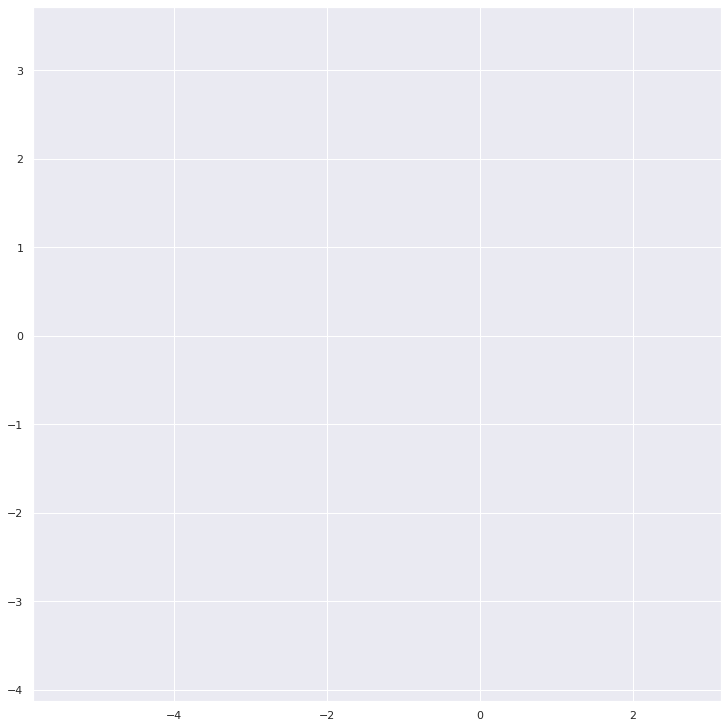

In [19]:
plot_LFCs_scatter(d, alpha=1)

In [20]:
df_dict = d
lfc_series = []
for key, value in df_dict.items():
    value[key] = value['log2FoldChange']
    lfc_series.append(value[key])

joined_df = pd.concat(lfc_series, axis=1)

print(joined_df)

                  proMS  co-cultures
MIT9301_01230  2.743098    -0.981458
MIT9301_00355  1.813839    -0.313008
MIT9301_01127 -1.637747     1.400272
MIT9301_00043 -2.800179     2.736343
MIT9301_00183 -1.874012     1.793959
...                 ...          ...
MIT9301_01513  0.001710    -0.515471
MIT9301_00281 -0.001033     0.367556
MIT9301_00816 -0.000215    -0.270567
MIT9301_00105 -0.000078    -0.118038
MIT9301_00252 -0.000012     0.163759

[1913 rows x 2 columns]


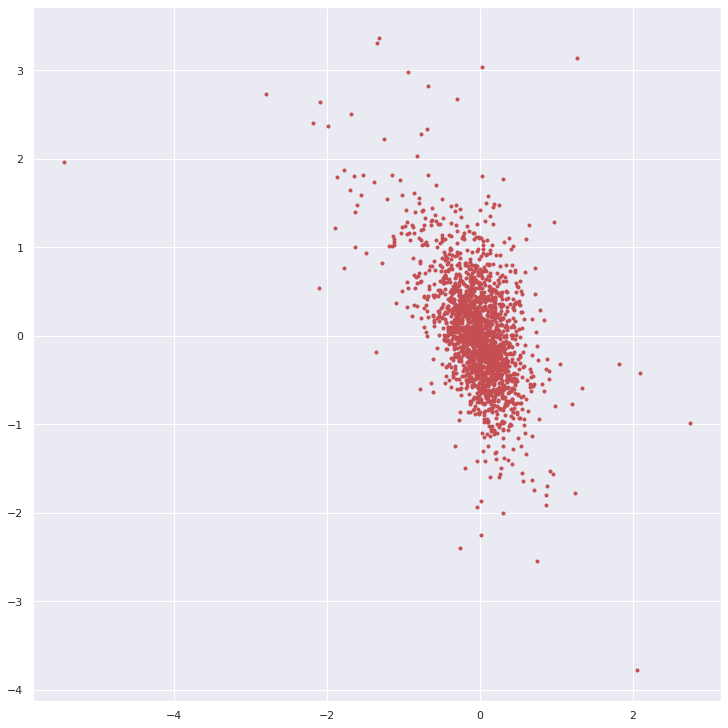

In [24]:
fig = plt.figure(figsize=(10, 10), constrained_layout=True)

for row in joined_df.to_numpy():
    plt.plot(row[0], row[1], "r.")

plt.show()

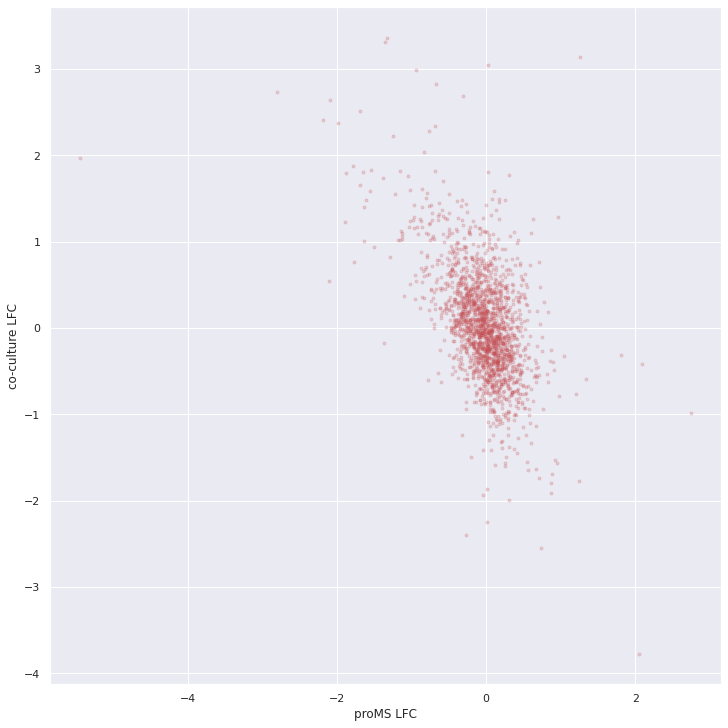

In [30]:
fig = plt.figure(figsize=(10, 10), constrained_layout=True)

for row in joined_df.to_numpy():
    plt.plot(row[0], row[1], "r.", alpha=0.2)

plt.xlabel("proMS LFC")
plt.ylabel("co-culture LFC")

plt.show()

In [27]:
joined_df[(joined_df["proMS"] < -4) & (joined_df["co-cultures"] > 1.5)]

,proMS,co-cultures
MIT9301_01008,-5.43996,1.967865


In [34]:
experiment_11_results_df.loc["MIT9301_01008"]

baseMean                                                     9.328555
symlog10baseMean                                              1.01404
log2FoldChange                                               -5.43996
lfcSE                                                        1.090226
stat                                                        -4.989752
pvalue                                                       0.000001
padj                                                         0.000043
product                                          hypothetical protein
seq_id                                                      MIT9301_1
source                                                   Prodigal:2.6
type                                                              CDS
start                                                          872460
end                                                            872645
score                                                               .
strand              

In [36]:
gff_df = experiment_11_results_df[['product', 'seq_id', 'source', 'type', 'start', 'end',
       'score', 'strand', 'phase', 'attributes', 'Name', 'eC_number', 'gene',
       'inference', 'locus_tag', 'note', 'organism', 'Dbxref', 'Note',
       'Parent', 'anticodon', 'bound_moiety', 'end_range', 'gbkey',
       'gene_biotype', 'gene_synonym', 'genome', 'mol_type', 'old_locus_tag',
       'partial', 'protein_id', 'pseudo', 'regulatory_class', 'start_range',
       'strain', 'transl_table']]

gff_df

,product,seq_id,source,type,start,end,score,strand,phase,attributes,...,genome,mol_type,old_locus_tag,partial,protein_id,pseudo,regulatory_class,start_range,strain,transl_table
MIT9301_01230,tRNA-Pro(tgg),MIT9301_1,Aragorn:1.2,tRNA,1045700,1045774,.,+,.,ID=MIT9301_01230;inference=COORDINATES:profile...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIT9301_00355,23S ribosomal RNA,MIT9301_1,barrnap:0.7,rRNA,324619,327490,0,+,.,ID=MIT9301_00355;locus_tag=MIT9301_00355;produ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIT9301_01127,hypothetical protein,MIT9301_1,Prodigal:2.6,CDS,948265,948549,.,-,0,ID=MIT9301_01127;inference=ab initio predictio...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIT9301_00043,hypothetical protein,MIT9301_1,Prodigal:2.6,CDS,42990,43133,.,+,0,ID=MIT9301_00043;inference=ab initio predictio...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIT9301_00183,hypothetical protein,MIT9301_1,Prodigal:2.6,CDS,168383,169843,.,-,0,ID=MIT9301_00183;inference=ab initio predictio...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MIT9301_01513,acyl-phosphate glycerol-3-phosphate acyltransf...,MIT9301_1,Prodigal:2.6,CDS,1281028,1281621,.,+,0,ID=MIT9301_01513;inference=ab initio predictio...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIT9301_00281,hypothetical protein,MIT9301_1,Prodigal:2.6,CDS,259082,259333,.,+,0,ID=MIT9301_00281;inference=ab initio predictio...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIT9301_00816,D-ala-D-ala dipeptidase,MIT9301_1,Prodigal:2.6,CDS,705661,706344,.,+,0,ID=MIT9301_00816;Name=ddpX;gene=ddpX;inference...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIT9301_00105,putative serine protease,MIT9301_1,Prodigal:2.6,CDS,105099,106220,.,-,0,ID=MIT9301_00105;inference=ab initio predictio...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
joined_df.join(gff_df).to_csv("joined_df.tsv", sep="\t")